In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [2]:
Crime_Data=pd.read_csv("G:/ExcelR_Data/Data_Science_Course/Assignments/Clustering/crime_data.csv")
Crime_Data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
Crime_Data.isnull().sum()
#NO Null values are present

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
#Print the duplicated rows
Crime_Data[Crime_Data.duplicated()]
#No duplicate rows

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
# Normalized dataset
df_norm = norm_func(Crime_Data.iloc[:,1:])
df_norm.head(10) 

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [9]:
###### screw plot or elbow curve ############
k = list(range(1,10))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

([<matplotlib.axis.XTick at 0x20c7734dcd0>,
 <a list of 9 Text major ticklabel objects>)

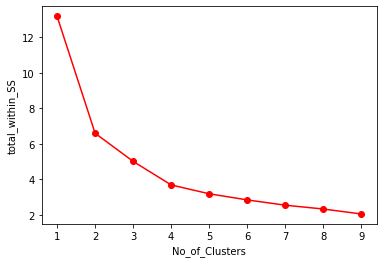

In [10]:
# elbow curve
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [11]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=4) 
model.fit(df_norm)

KMeans(n_clusters=4)

In [12]:
Crime_Data['clusterNo']=model.labels_ 
Crime_Data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterNo
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,3


In [14]:
# getting aggregate mean of each cluster
Crime_Data.iloc[:,1:5].groupby(Crime_Data.clusterNo).mean()

,Murder,Assault,UrbanPop,Rape
clusterNo,,,,
0,10.966667,264.000000,76.500000,33.608333
1,3.600000,78.538462,52.076923,12.176923
2,5.852941,141.176471,73.647059,19.335294
3,13.937500,243.625000,53.750000,21.412500
